In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Simple Environments

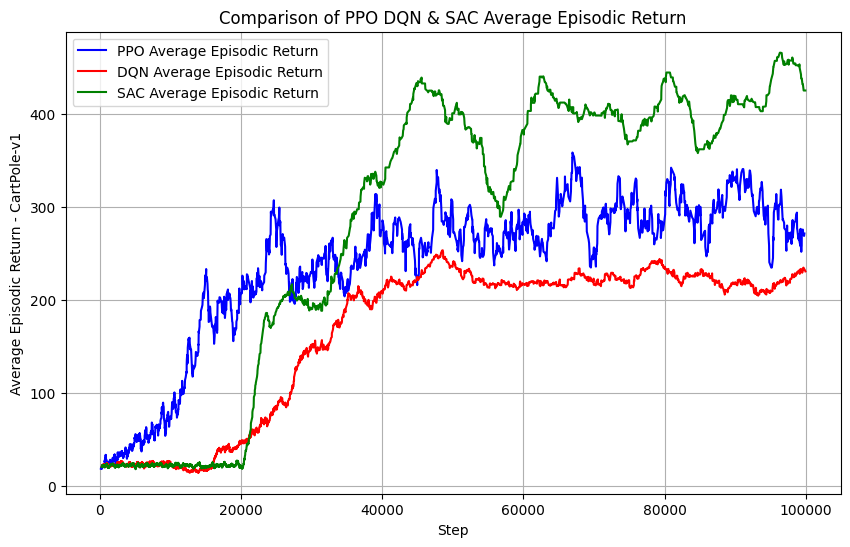

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directories for PPO and DQN data
ppo_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/ppo_runs/cartpole'
dqn_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/dqn_runs/cartpole'
sac_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/sac_runs/cartpole'
# qreps_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/Q-Reps/other/qreps_runs/cartpole'

# Function to load CSV files into a DataFrame
def load_data(directory):
    all_data = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            all_data.append(df)
    return pd.concat(all_data, ignore_index=True)

# Load data into DataFrames
ppo_df = load_data(ppo_dir)
dqn_df = load_data(dqn_dir)
sac_df = load_data(sac_dir)
# qreps_df = load_data(qreps_dir)

# Calculate average and standard deviation for PPO
ppo_avg_return = ppo_df.groupby('Step')['Reward'].mean().rolling(window=20).mean()
# ppo_std_return = ppo_df.groupby('Step')['Reward'].std().groupby('Step').mean()

# Calculate average and standard deviation for DQN
dqn_avg_return = dqn_df.groupby('Step')['Reward'].mean().rolling(window=50).mean()
# dqn_std_return = dqn_df.groupby('Step')['Reward'].std().groupby('Step').mean()

sac_avg_return = sac_df.groupby('Step')['Reward'].mean().rolling(window=50).mean()

# qreps_avg_return = qreps_df.groupby('Step')['Reward'].mean().rolling(window=50).mean()
# Plotting
plt.figure(figsize=(10, 6))

# Plot PPO data
plt.plot(ppo_avg_return.index, ppo_avg_return.values, label='PPO Average Episodic Return', color='blue')
# plt.fill_between(ppo_avg_return.index, ppo_avg_return.values - ppo_std_return.values, ppo_avg_return.values + ppo_std_return.values,
#                  color='blue', alpha=0.2)

# Plot DQN data
plt.plot(dqn_avg_return.index, dqn_avg_return.values, label='DQN Average Episodic Return', color='red')
# plt.fill_between(dqn_avg_return.index, dqn_avg_return.values - dqn_std_return.values, dqn_avg_return.values + dqn_std_return.values,
#                  color='red', alpha=0.2)

plt.plot(sac_avg_return.index, sac_avg_return.values, label='SAC Average Episodic Return', color='green')
# plt.plot(qreps_avg_return.index, qreps_avg_return.values, label='Q-Reps Average Episodic Return', color='orange')

plt.xlabel('Step')
plt.ylabel('Average Episodic Return - CartPole-v1')
plt.title('Comparison of PPO DQN & SAC Average Episodic Return')
plt.legend()
plt.grid(True)
plt.show()


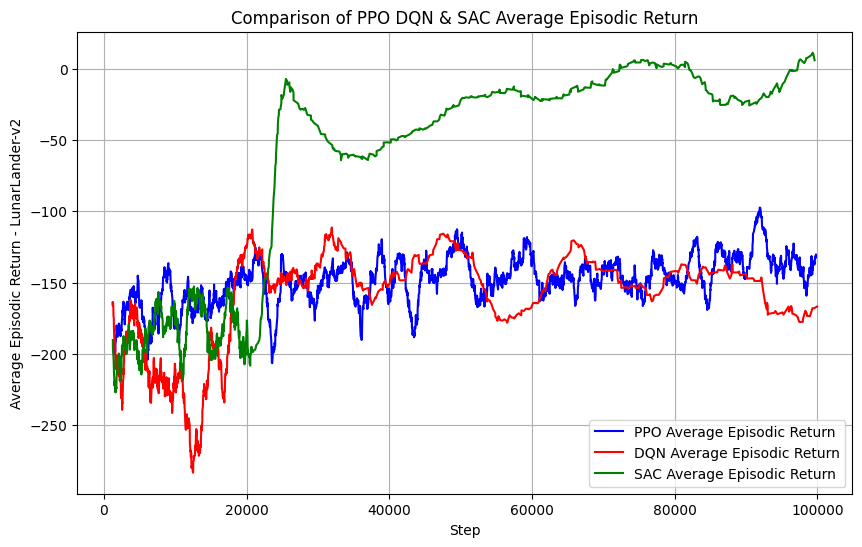

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directories for PPO and DQN data
ppo_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/ppo_runs/lunarlander'
dqn_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/dqn_runs/lunarlander'
sac_dir = '/Users/nicolasvila/workplace/uni/tfg_v2/tests/other/sac_runs/lunarlander'

# Function to load CSV files into a DataFrame
def load_data(directory):
    all_data = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            all_data.append(df)
    return pd.concat(all_data, ignore_index=True)

# Load data into DataFrames
ppo_df = load_data(ppo_dir)
dqn_df = load_data(dqn_dir)
sac_df = load_data(sac_dir)

# Calculate average and standard deviation for PPO
ppo_avg_return = ppo_df.groupby('Step')['Reward'].mean().rolling(window=50).mean()
# ppo_std_return = ppo_df.groupby('Step')['Reward'].std().groupby('Step').mean()

# Calculate average and standard deviation for DQN
dqn_avg_return = dqn_df.groupby('Step')['Reward'].mean().rolling(window=50).mean()
# dqn_std_return = dqn_df.groupby('Step')['Reward'].std().groupby('Step').mean()

sac_avg_return = sac_df.groupby('Step')['Reward'].mean().rolling(window=50).mean()
# Plotting
plt.figure(figsize=(10, 6))

# Plot PPO data
plt.plot(ppo_avg_return.index, ppo_avg_return.values, label='PPO Average Episodic Return', color='blue')
# plt.fill_between(ppo_avg_return.index, ppo_avg_return.values - ppo_std_return.values, ppo_avg_return.values + ppo_std_return.values,
#                  color='blue', alpha=0.2)

# Plot DQN data
plt.plot(dqn_avg_return.index, dqn_avg_return.values, label='DQN Average Episodic Return', color='red')
# plt.fill_between(dqn_avg_return.index, dqn_avg_return.values - dqn_std_return.values, dqn_avg_return.values + dqn_std_return.values,
#                  color='red', alpha=0.2)

plt.plot(sac_avg_return.index, sac_avg_return.values, label='SAC Average Episodic Return', color='green')


plt.xlabel('Step')
plt.ylabel('Average Episodic Return - LunarLander-v2')
plt.title('Comparison of PPO DQN & SAC Average Episodic Return')
plt.legend()
plt.grid(True)
plt.show()